# Titanic - Machine Learning from Disaster

Using a simple logistic regression classifier

### Importing Libraries

In [1]:
import numpy as np
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImpute

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Load the files

In [79]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_gender = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

### Quick glance through the data

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [35]:
df_train.shape

(891, 12)

In [9]:
df_test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
235,1127,3,"Vendel, Mr. Olof Edvin",male,20.0,0,0,350416,7.8542,NaN,S


In [5]:
df_test.shape

(418, 11)

### Checking for missing data

<AxesSubplot:>

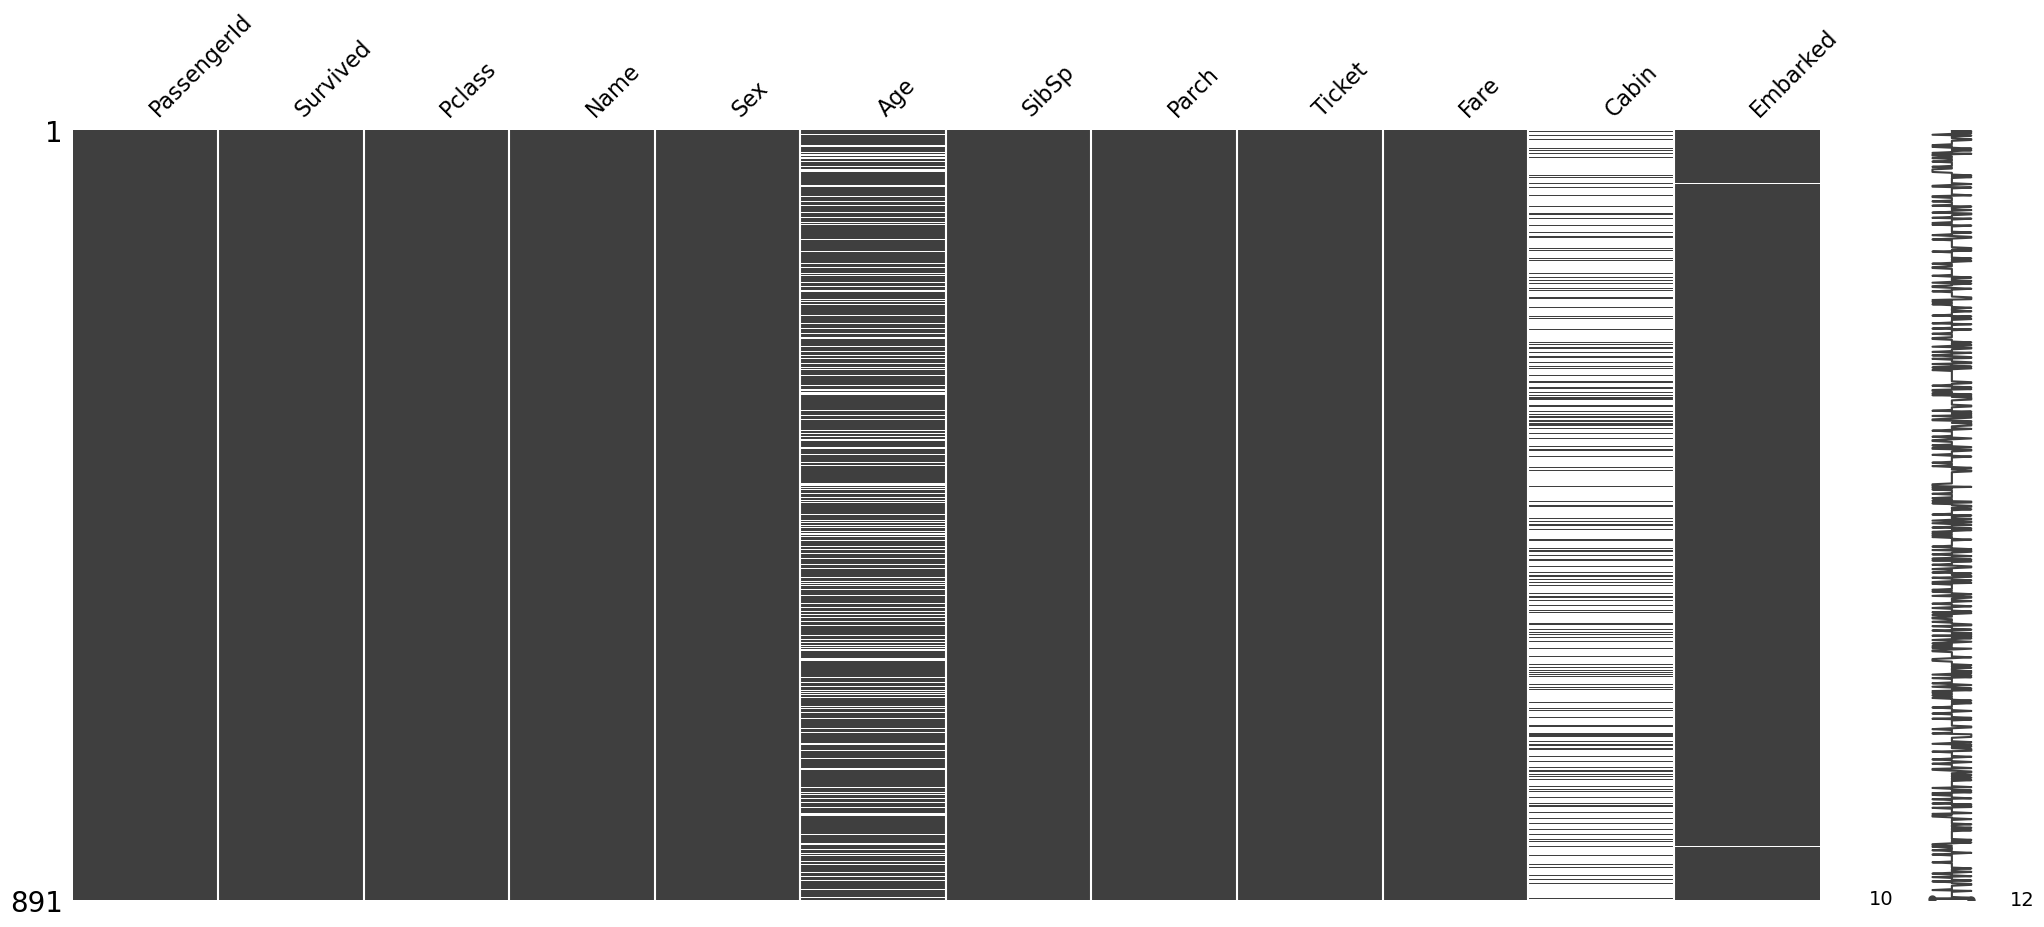

In [11]:
msno.matrix(df_train)


There are some nulls in Age, Cabin adn Embarked columns

In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Analysing and Visualising Data

In [4]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = round(sum(women)*100/len(women),2)

men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = round(sum(men)*100/len(men),2)

gender_ratio = {'Men': rate_men, 'Women': rate_women}
df_gender_ratio = pd.DataFrame(gender_ratio.items(), columns = ['Gender', 'Survival Rate'])
df_gender_ratio

,Gender,Survival Rate
0,Men,18.89
1,Women,74.20


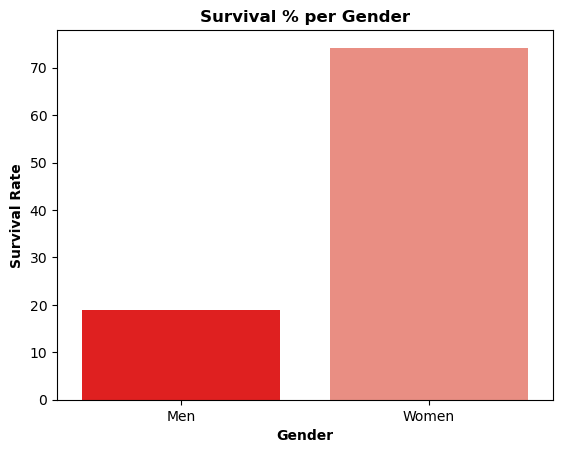

In [5]:
palette = {'Men': 'red', 'Women':'salmon'}
sns.barplot(x=df_gender_ratio['Gender'], y=df_gender_ratio['Survival Rate'],palette=palette )

plt.title('Survival % per Gender', fontweight = 'bold')
plt.xlabel('Gender',fontweight = 'bold')
plt.ylabel('Survival Rate',fontweight = 'bold')
plt.show()

In [6]:
class_1 = df_train.loc[df_train.Pclass == 1]["Survived"]
class_1_rate = round(sum(class_1)*100/len(class_1),2)

class_2 = df_train.loc[df_train.Pclass == 2]["Survived"]
class_2_rate = round(sum(class_2)*100/len(class_2),2)

class_3 = df_train.loc[df_train.Pclass == 3]["Survived"]
class_3_rate = round(sum(class_3)*100/len(class_3),2)

class_rates = {'class_1': class_1_rate, 'class_2': class_2_rate, 'class_3': class_3_rate}
df_class_rates = pd.DataFrame(class_rates.items(), columns=['PClass', 'Survival Rate'])
df_class_rates

,PClass,Survival Rate
0,class_1,62.96
1,class_2,47.28
2,class_3,24.24


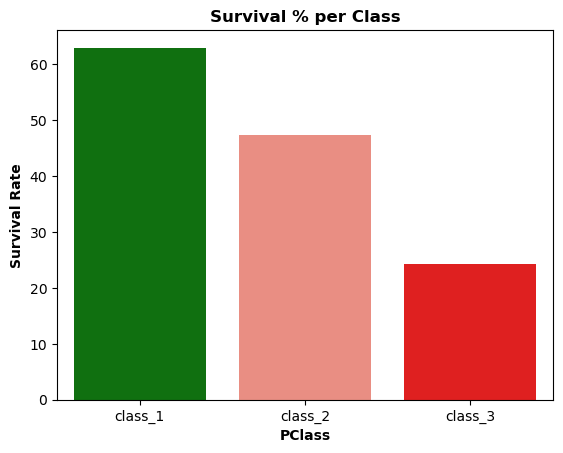

In [9]:
palette = {'class_1': 'green', 'class_2': 'salmon','class_3':'red'}
sns.barplot(x=df_class_rates['PClass'], y=df_class_rates['Survival Rate'], palette=palette)

plt.title('Survival % per Class', fontweight = 'bold')
plt.xlabel('PClass',fontweight = 'bold')
plt.ylabel('Survival Rate',fontweight = 'bold')
plt.show()

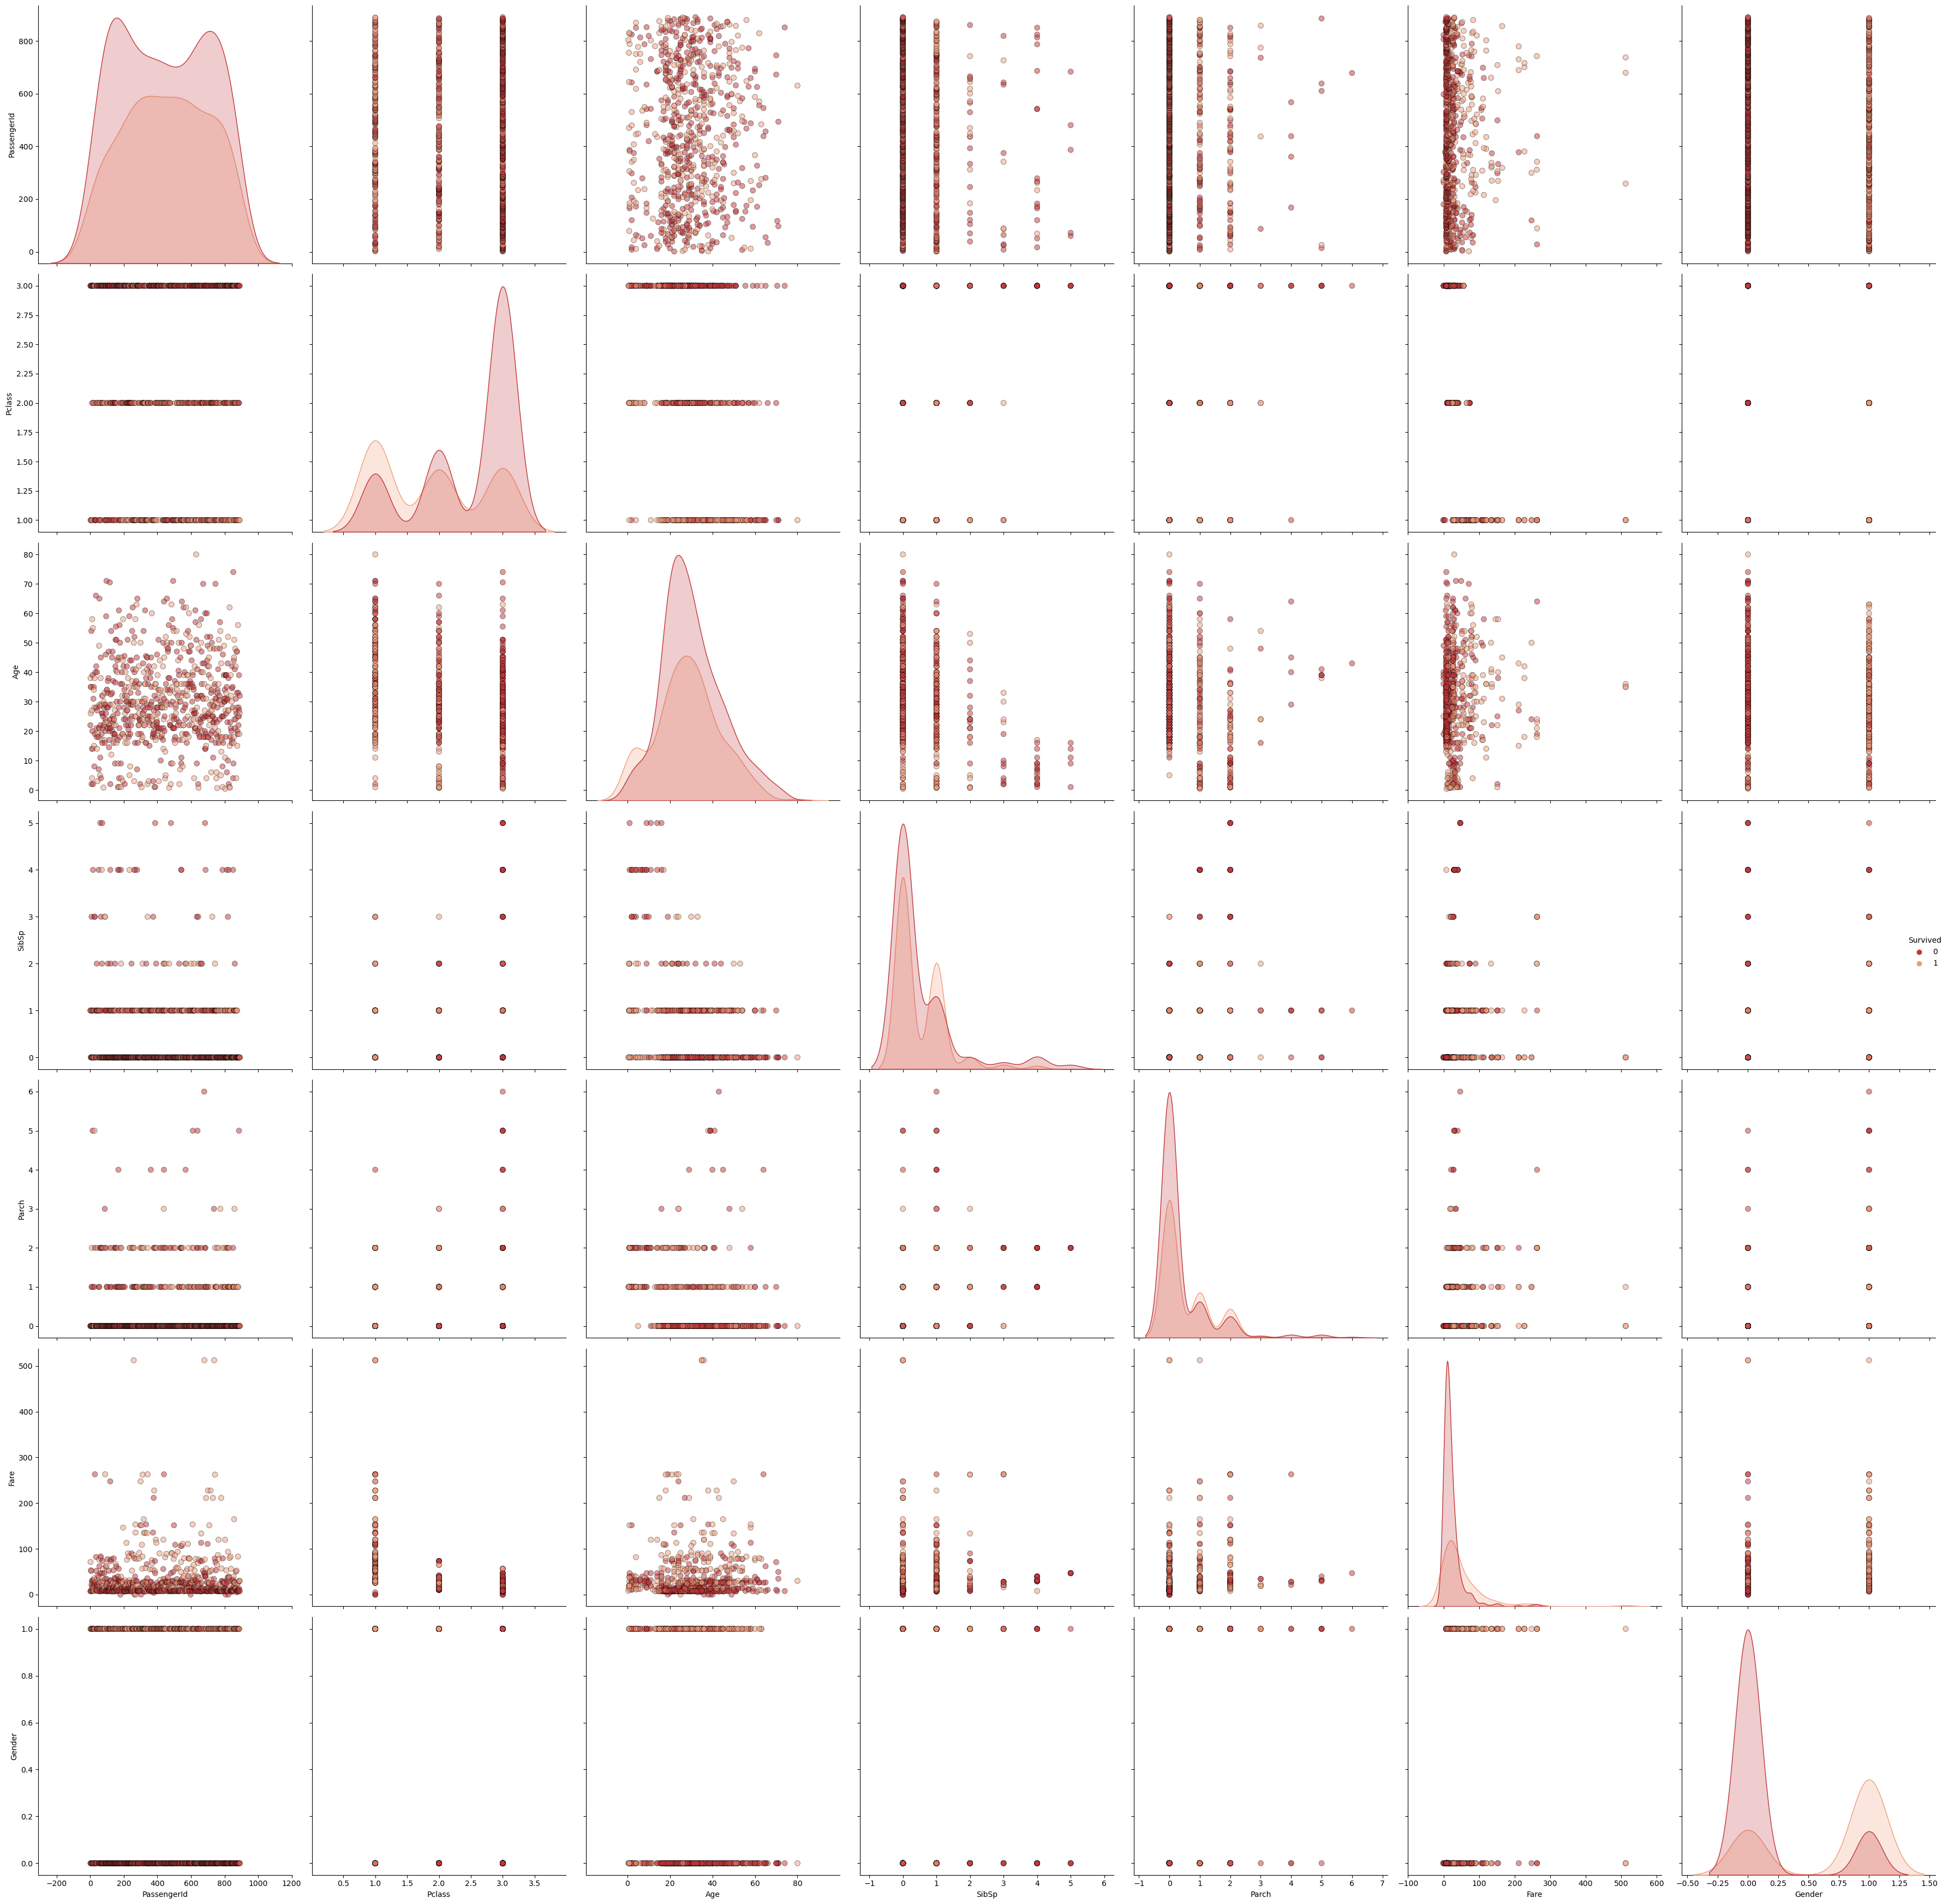

In [50]:
sns.set_palette("RdBu")

sample = df_train
g = sns.pairplot(sample, diag_kind='kde', 
                 plot_kws={'alpha': 0.50, 's': 50, 'edgecolor': 'k'},
                 height=5, hue='Survived')
# g.map_diag(sns.kdeplot, shade=True)
# g.map_upper(plt.scatter, alpha=0.5)
# g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=True)

plt.tight_layout()
plt.show()

### Transform Data

In [80]:
# For ease of analysis, we are creating a new column 'Gender' which is integer. Contains 0 for male and 1 for female.
df_train['Gender'] = df_train['Sex'].replace({'male': 0, 'female': 1}).astype(int)
df_test['Gender'] = df_test['Sex'].replace({'male': 0, 'female': 1}).astype(int)


In [86]:
# Create a SimpleImputer object to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the 'age' column and transform the values
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])

### Build Logistic Regression Classifier

Separate the predictors and response for train and test subsets

In [87]:
X_train, y_train = df_train[['Pclass', 'Gender','Age','SibSp','Parch']], df_train['Survived']
X_test = df_test[['Pclass', 'Gender','Age','SibSp','Parch']]

Train the model and use it for predictions

In [88]:
classifier = LogisticRegression(solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

df_test["Survived"] = classifier.predict(X_test)
predicted_results = df_test[["PassengerId", "Survived"]]

In [89]:
predicted_results.shape

(418, 2)

In [90]:
predicted_results.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


Let us visualise the model's performance

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:199: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


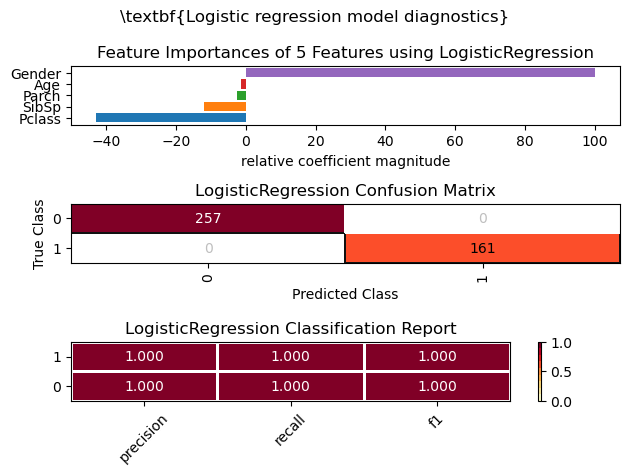

In [91]:
fig, axes = plt.subplots(3, 1)

model = classifier
visualgrid = [
    FeatureImportances(model, ax=axes[0]),
    ConfusionMatrix(model, ax=axes[1]),
    ClassificationReport(model, ax=axes[2]),
]


for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test, df_test["Survived"])
    viz.finalize()
    
plt.suptitle(r'\textbf{Logistic regression model diagnostics}');
plt.tight_layout();
plt.show() 

From these results, it looks like the model is doing a pretty good job at the predicting the results.

### Convert Result to A File

In [93]:
predicted_results.to_csv('/kaggle/working/PredictedResults.csv', index = False)